# Lab Assignment Seven: Sequential Network Architectures

<font color="green">

## Team: Aitor Elfau, Abdul Wasay, Palmer Nelson
</font>

### Dataset Selection

#### Select a dataset that is text. That is, the dataset should be text data. In terms of generalization performance, it is helpful to have a medium sized dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification should be "many-to-one" sequence classification. 

<font color="green">

We selected
    
    Cyberbullying Tweets
    
    https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets/data
    
csv file has 2 columns
    
    - Text    : string with the Tweet
    
    - CB_Label: Boolean value 0/1.  with 1 representing CyberBullying tweet. 
    
Characteristics
    
    - Perfectly Balanced 50/50
    
    - 11101 observations

We will use the CNNs and Transformers to classify these tweets into cyberbullying (mean) and normal tweets.
 
</font>


### Preparation (3 points total)
##### [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.  

Statistics of sequence lengths:
Min Length: 0
Max Length: 737
Mean Length: 16.91072072072072
Median Length: 14.0
Standard Deviation: 18.176914683424403


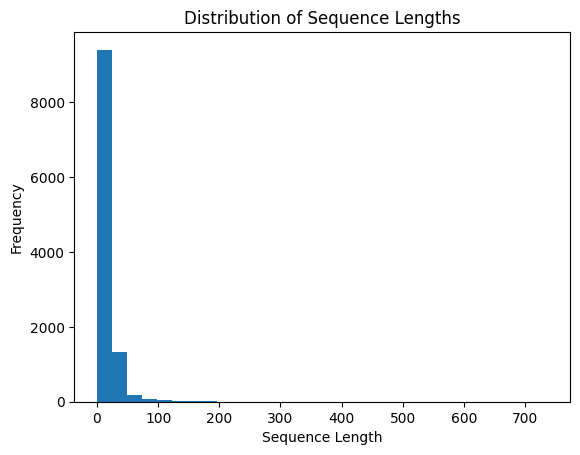

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("CyberBullying Comments Dataset.csv")

# Tokenize the text
#top_words = 1000
tokenizer = Tokenizer()#num_words=top_words)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

word_index = tokenizer.word_index

#length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Basic statistics
print("Statistics of sequence lengths:")
print("Min Length:", np.min(sequence_lengths))
print("Max Length:", np.max(sequence_lengths))
print("Mean Length:", np.mean(sequence_lengths))
print("Median Length:", np.median(sequence_lengths))
print("Standard Deviation:", np.std(sequence_lengths))

# Histogram of sequence lengths
plt.hist(sequence_lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


In [2]:
# Loop from 50 to 120 in increments of 5
for cutoff in range(50, 125, 5):
    num_records = sum(length <= cutoff for length in sequence_lengths)
    print(f"Number of records with sequence length <= {cutoff}: {num_records}")

Number of records with sequence length <= 50: 10757
Number of records with sequence length <= 55: 10821
Number of records with sequence length <= 60: 10858
Number of records with sequence length <= 65: 10887
Number of records with sequence length <= 70: 10915
Number of records with sequence length <= 75: 10934
Number of records with sequence length <= 80: 10954
Number of records with sequence length <= 85: 10970
Number of records with sequence length <= 90: 10987
Number of records with sequence length <= 95: 10997
Number of records with sequence length <= 100: 11014
Number of records with sequence length <= 105: 11024
Number of records with sequence length <= 110: 11037
Number of records with sequence length <= 115: 11041
Number of records with sequence length <= 120: 11050


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Set fixed length for padding/truncating
fixed_length = 35
max_length = 50

# 
filtered_sequences = [seq for seq, length in zip(sequences, sequence_lengths) if length <= max_length]
filtered_df = df.loc[[length <= max_length for length in sequence_lengths]]

# Pad sequences
data = pad_sequences(filtered_sequences, maxlen=fixed_length)

# Prepare labels
labels = filtered_df['CB_Label'].values


print("Feature Matrix (X) Shape:", data.shape)
print("Label Vector (y) Shape:", labels.shape)
print("Number of Sequences:", len(data))
print("Length of Each Sequence:", fixed_length)
print("Distribution of Class Labels:", np.bincount(labels))

Feature Matrix (X) Shape: (10757, 35)
Label Vector (y) Shape: (10757,)
Number of Sequences: 10757
Length of Each Sequence: 35
Distribution of Class Labels: [5537 5220]


<font color="green">
    
### Class Variable Representation
We are using the in-built (to the dataset) binary classification using integers, where 0 is not-cyber-bullying and 1 is cyber-bullying tweet. Since this is a binary classification task, we do not need to one-hot encode etc. 

### Pre - Processing
We are using tokenization to convert the text into sequences of integers. We decided not to use top words in the tokenizer as there may be niche scenarios of certain words that contribute towards cyberbullying tweets.

Based on the graph and stats above, we will use a size of 35 ~(mean plus standard deviation) in order to accomodate most tweets. This means we will truncate the longer tweets and pad the samller ones to a size of 35. 
We will also be removing the tweets that are longer than 50 characters, because they are very few (less than 100 in a 11k long dataset.

### Final Dataset Description
 - Feature Matrix (X) Shape: (10757, 35)
We have 11,100 sequences (tweets) in the dataset. Each sequence is represented by 35 integers, as we've chosen to pad/truncate the sequences to this fixed length.

 - Label Vector (y) Shape: (10757,)
We have 10757 labels corresponding to the 10757 sequences. The shape confirms that each sequence has exactly one label, as expected for a binary classification.

 - Distribution of Class Labels: [5537 5220]
We have a close to 50/50 balanced dataset, with 5,537 sequences labeled as 'not cyberbullying' (represented by 0) and 5,220 sequences labeled as 'cyberbullying' (represented by 1). This should not impact our overall results. 
    
</font>

##### [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

<font color="green">

### Metrics to be used:

We want to use our algorithm in the context of schools detecting cyberbullying for their students. As it is a problem nowadays. If we can employ this algorithm on tweets that are sent out by students of our school, it can help us decide if our school needs to focus its efforts on stopping this problem. 

For our particular use case, we will choose to use F1-score. As it encompasses both precision and recall. 
Precision is essential because incorrectly identifying a student's message as cyberbullying could lead to undue stress or disciplinary actions against innocent students.
Recall is equally important because failing to detect actual cyberbullying incidents can leave students vulnerable and allow harmful behaviors to go unchecked.

By optimizing for the F1 score, the algorithm will try to minimize both false positives and false negatives. This balance will promote trust in the algorithm among students, parents, and educators. A high F1 score indicates that the algorithm is reliable and can be trusted to make fair judgments, which is vital for its acceptance and continued use in a school environment.

</font>

##### [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=labels  # This ensures equal representation of classes
)


In [10]:
print(type(X_train), X_train.shape)
print(type(X_train[0]), X_train[0].shape)
print('Vocabulary size:', np.max(X_train))
print(y_train.shape, np.min(y_train), np.max(y_train))
NUM_CLASSES = 1

<class 'numpy.ndarray'> (8605, 35)
<class 'numpy.ndarray'> (35,)
Vocabulary size: 18318
(8605,) 0 1


<font color="green">

### Split Method

We elected to use the random split with stratified labels. Since our dataset is large enough (11100 tweets), a random split is straightforward and ensures that both training and testing sets are likely to be representative of the overall dataset.

In the real-world scenario of a school environment, new examples of cyberbullying can be expected to occur randomly, and a model trained on a randomly split dataset will likely be more robust to such random occurrences.

We also use 'stratify=labels', that will split the data in a way that maintains the same proportion of each class in both the training and test sets as in the original dataset.

</font>

### Modeling (6 points total)
##### [3 points] Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). Alternatively, you may also choose a recurrent network and Transformer network. Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

In [47]:
# !ls -a "large_data/glove/" 
!ls -a "./" 

.                                  glove.6B.200d.txt
..                                 glove.6B.300d.txt
.ipynb_checkpoints                 glove.6B.50d.txt
CyberBullying Comments Dataset.csv lab_7a.ipynb
archive                            lab_7b.ipynb
glove.6B.100d.txt


In [48]:
!head "./glove.6B.100d.txt"

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158 

In [11]:
%%time
EMBED_SIZE = 100

embeddings_index = {}
f = open('./glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (18319, 100) 
 Total words found: 13705 
 Percentage: 74.81303564605055
CPU times: user 3.67 s, sys: 102 ms, total: 3.77 s
Wall time: 3.78 s


### CNN1

In [12]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=fixed_length,
                            trainable=False)

In [96]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


sequence_input = Input(shape=(fixed_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
x = MaxPooling1D(3)(x)  
x = Dropout(0.3)(x)

x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
x = MaxPooling1D(3)(x) 
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)

preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

model = Model(sequence_input, preds)

print(model.summary())

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 35)]              0         
                                                                 
 glove_token_and_position_e  (None, 35, 100)           1835400   
 mbedding_5 (GloveTokenAndP                                      
 ositionEmbedding)                                               
                                                                 
 conv1d_31 (Conv1D)          (None, 31, 128)           64128     
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 10, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 10, 128)           0         
                                                          

In [97]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Learning rate schedule and optimizer setup
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

opt = Adam(epsilon=0.0001, learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=20, batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/20
269/269 [==============================] - 5s 16ms/step - loss: 0.7639 - acc: 0.5340 - val_loss: 0.6724 - val_acc: 0.5994
Epoch 2/20
269/269 [==============================] - 3s 13ms/step - loss: 0.6670 - acc: 0.6033 - val_loss: 0.6440 - val_acc: 0.6561
Epoch 3/20
269/269 [==============================] - 3s 13ms/step - loss: 0.6233 - acc: 0.6589 - val_loss: 0.5999 - val_acc: 0.6975
Epoch 4/20
269/269 [==============================] - 3s 13ms/step - loss: 0.5890 - acc: 0.6917 - val_loss: 0.6108 - val_acc: 0.6696
Epoch 5/20
269/269 [==============================] - 3s 13ms/step - loss: 0.5593 - acc: 0.7163 - val_loss: 0.5808 - val_acc: 0.7170
Epoch 6/20
269/269 [==============================] - 3s 13ms/step - loss: 0.5323 - acc: 0.7386 - val_loss: 0.5740 - val_acc: 0.7026
Epoch 7/20
269/269 [==============================] - 3s 13ms/step - loss: 0.4943 - acc: 0.7666 - val_loss: 0.5635 - val_acc: 0.7207
Epoch 8/20
269/269 [==============================] - 3s 13ms/step - 

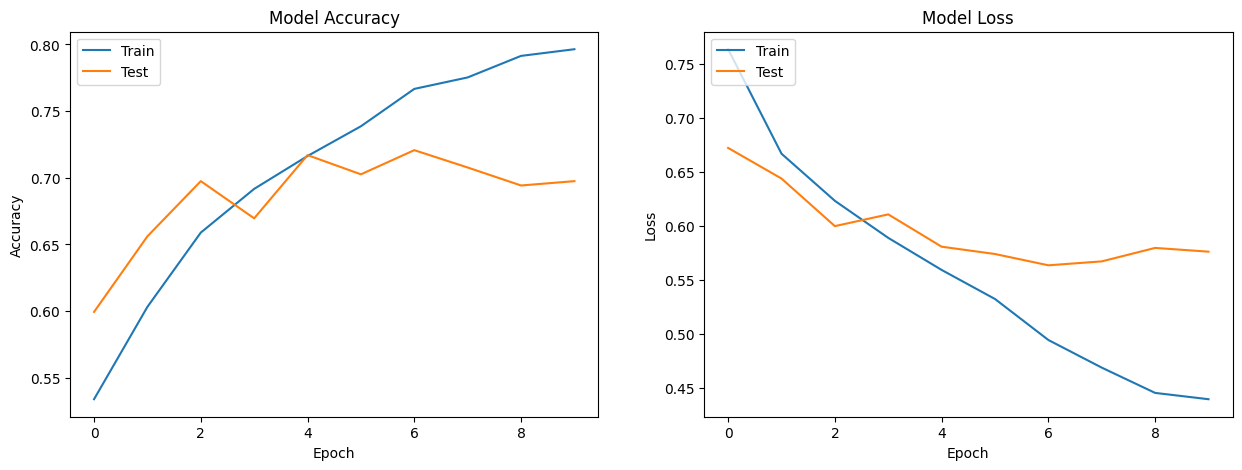

68/68 [==============================] - 0s 2ms/step
Train F1 Score: 0.8640
Test F1 Score: 0.6769


In [99]:
# Extract the history records
history_dict = history.history

# Summarize history for accuracy
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(121)
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss plot
plt.subplot(122)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Calculate F1 score for both training and testing data
train_pred = (model.predict(X_train) > 0.5).astype('int32')
test_pred = (model.predict(X_test) > 0.5).astype('int32')

train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<font color="green">

In our first CNN, we used 2 convolutional layers with 128 filters and size 5 and ReLU activations. We also used the Glove embedding 100. 
We also kept the dropout fairly aggressive at 0.3, 0.4 and 0.5 after each maxpooling layers. 


We trained for 20 Epochs and with Batch Size of 32. With early stopping that stopped the model at 10 epochs. 


The model showed improvement in both training and validation accuracy over epochs but there may be some overfitting as the validation loss started to increase after a few epochs, despite improvements in training loss and accuracy.

Training Accuracy: ~80% 
Validation Accuracy: ~70%, but with some fluctuations.

F1 Scores: Achieved a Train F1 Score of 0.8640 and a Test F1 Score of 0.6769. This model may be overfitting.

</font>

### CNN2

<font color="green">

For our next CNN in order to improve it, we will change:
 - The number of filters in each Conv1D layer is reduced to 64.
 - L2 regularization with a factor of 0.01 is added to Conv1D and Dense layers.
 - Dropout rates are slightly increased to 0.5.
 - The Dense layer's number of neurons is reduced to 64.
These changes are so that we can reduce overfitting and generalization performance.

</font>

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.regularizers import l2

sequence_input = Input(shape=(fixed_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# Reduce the number of filters and add L2 regularization
x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01))(embedded_sequences)
x = MaxPooling1D(3)(x)
x = Dropout(0.5)(x)  # Slightly increased dropout

x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01))(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.5)(x)  # Slightly increased dropout

x = Flatten()(x)
x = Dropout(0.5)(x)

# Reduce the number of neurons in Dense layer and add L2 regularization
x = Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01))(x)

preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

model = Model(sequence_input, preds)
print(model.summary())

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 35)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 35, 100)           1831900   
                                                                 
 conv1d_29 (Conv1D)          (None, 31, 64)            32064     
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 10, 64)            0         
 ng1D)                                                           
                                                                 
 dropout_45 (Dropout)        (None, 10, 64)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 6, 64)             20544     
                                                          

In [75]:
# Learning rate schedule and optimizer setup
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

opt = Adam(epsilon=0.0001, learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=20, batch_size=16, 
                    callbacks=[early_stopping])

Epoch 1/20
538/538 [==============================] - 18s 31ms/step - loss: 3.8258 - acc: 0.5250 - val_loss: 2.8687 - val_acc: 0.5502
Epoch 2/20
538/538 [==============================] - 16s 31ms/step - loss: 2.3004 - acc: 0.5488 - val_loss: 1.8181 - val_acc: 0.5767
Epoch 3/20
538/538 [==============================] - 17s 31ms/step - loss: 1.4927 - acc: 0.5943 - val_loss: 1.2445 - val_acc: 0.6585
Epoch 4/20
538/538 [==============================] - 18s 33ms/step - loss: 1.0703 - acc: 0.6467 - val_loss: 0.9567 - val_acc: 0.6910
Epoch 5/20
538/538 [==============================] - 17s 32ms/step - loss: 0.8576 - acc: 0.6617 - val_loss: 0.8221 - val_acc: 0.6826
Epoch 6/20
538/538 [==============================] - 17s 31ms/step - loss: 0.7466 - acc: 0.6804 - val_loss: 0.7444 - val_acc: 0.6836
Epoch 7/20
538/538 [==============================] - 17s 31ms/step - loss: 0.6968 - acc: 0.6888 - val_loss: 0.7071 - val_acc: 0.6984
Epoch 8/20
538/538 [==============================] - 17s 31ms

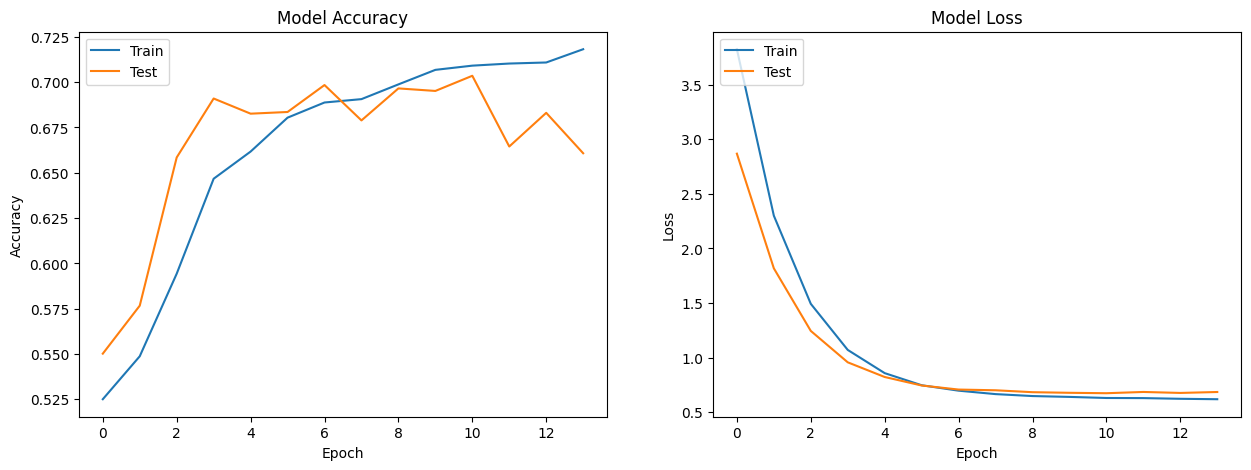

68/68 [==============================] - 0s 2ms/step
Train F1 Score: 0.5123
Test F1 Score: 0.4895


In [76]:
# Extract the history records
history_dict = history_2.history

# Summarize history for accuracy
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(121)
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss plot
plt.subplot(122)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Calculate F1 score for both training and testing data
train_pred = (model.predict(X_train) > 0.5).astype('int32')
test_pred = (model.predict(X_test) > 0.5).astype('int32')

train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<font color="green" >

We reduced the number of filters to 64 for both the convolutional layers. We also increased the dropout rates to 0.5 across all layers. We also reduced the number of neurons in the dense layer to 64. The learning rate schedule was also changed. The initial learning rate was reduced to 0.0005 and decay rate reduced to 0.9. The batch size was also reduced to 16. All of this was in pursuit of making the CNN perform better. 

We also tried 10 different other iterations, but the we were not able to get a better F1 score not better accuracy on the validation data. 

So the final interpretation for the second CNN, is Training accuracy ~72% and validation accuracy ~66%
The F1 scores for both training and testing are relatively low and very close (0.5123 for training and 0.4895 for testing), which are actually worse. Unfortunately, all the other iterations we tried with different hyper parameters, they did not increase the accuracies. We will move to the transformers.

</font>

### Tranformer 1

In [14]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Layer, MultiHeadAttention, Dropout, LayerNormalization, Dense, Embedding, GlobalAveragePooling1D, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        # apply the layers as needed (similar to PyTorch)
        
        # get the attention output from multi heads
        # Using same inpout here is self-attention
        # call inputs are (query, value, key) 
        # if only two inputs given, value and key are assumed the same
        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2


class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self, vocab_size, max_len, embed_dim, pretrained_weights):
        super().__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim, 
                                   weights=[pretrained_weights], input_length=max_len, 
                                   trainable=False)
        self.pos_emb = Embedding(input_dim=max_len, output_dim=embed_dim, 
                                 input_length=max_len, trainable=True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Transformer hyperparameters
embed_dim = EMBED_SIZE  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

vocab_size = len(word_index) + 1  # Size of vocabulary
max_len = fixed_length  # Length of input sequences

inputs = Input(shape=(max_len,))
embedding_layer = GloveTokenAndPositionEmbedding(vocab_size, max_len, embed_dim, embedding_matrix)
x = embedding_layer(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x) 

model_xformer = Model(inputs=inputs, outputs=outputs)
print(model_xformer.summary())

# Compile the model
model_xformer.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(),
              metrics=['acc'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 glove_token_and_position_e  (None, 35, 100)           1835400   
 mbedding_1 (GloveTokenAndP                                      
 ositionEmbedding)                                               
                                                                 
 transformer_block_1 (Trans  (None, 35, 100)           87632     
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_1  (None, 100)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 100)               0   

None


In [15]:
# Fit the model
history_3 = model_xformer.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=20, batch_size=32,  
                callbacks=[early_stopping])

Epoch 1/20
269/269 [==============================] - 13s 42ms/step - loss: 0.7550 - acc: 0.5675 - val_loss: 0.6112 - val_acc: 0.6789
Epoch 2/20
269/269 [==============================] - 10s 38ms/step - loss: 0.6620 - acc: 0.6201 - val_loss: 0.5841 - val_acc: 0.7003
Epoch 3/20
269/269 [==============================] - 10s 39ms/step - loss: 0.6235 - acc: 0.6579 - val_loss: 0.5801 - val_acc: 0.6770
Epoch 4/20
269/269 [==============================] - 10s 39ms/step - loss: 0.5955 - acc: 0.6782 - val_loss: 0.5424 - val_acc: 0.7156
Epoch 5/20
269/269 [==============================] - 10s 38ms/step - loss: 0.5810 - acc: 0.6933 - val_loss: 0.5514 - val_acc: 0.7138
Epoch 6/20
269/269 [==============================] - 10s 38ms/step - loss: 0.5664 - acc: 0.7068 - val_loss: 0.5337 - val_acc: 0.7230
Epoch 7/20
269/269 [==============================] - 10s 38ms/step - loss: 0.5541 - acc: 0.7121 - val_loss: 0.5916 - val_acc: 0.6928
Epoch 8/20
269/269 [==============================] - 10s 38ms

<font color="green">

The transformer model utilizes GloVe pre-trained embeddings with an embedding size set to `EMBED_SIZE` of 100 and processes input sequences of length `fixed_length` of 35. 

It features a transformer block with 2 attention heads and a feed-forward network size of 32. 

The architecture includes a global average pooling layer, two dropout layers with a rate of 0.2, and a dense layer with 20 neurons. 

Compiled for binary classification with RMSprop optimizer and binary cross-entropy loss, it employs early stopping with a patience of 3 to mitigate overfitting during training. 

The model trains on batch size 32 for up to 20 epochs, adjusting early if no improvement in validation loss is observed.

</font>

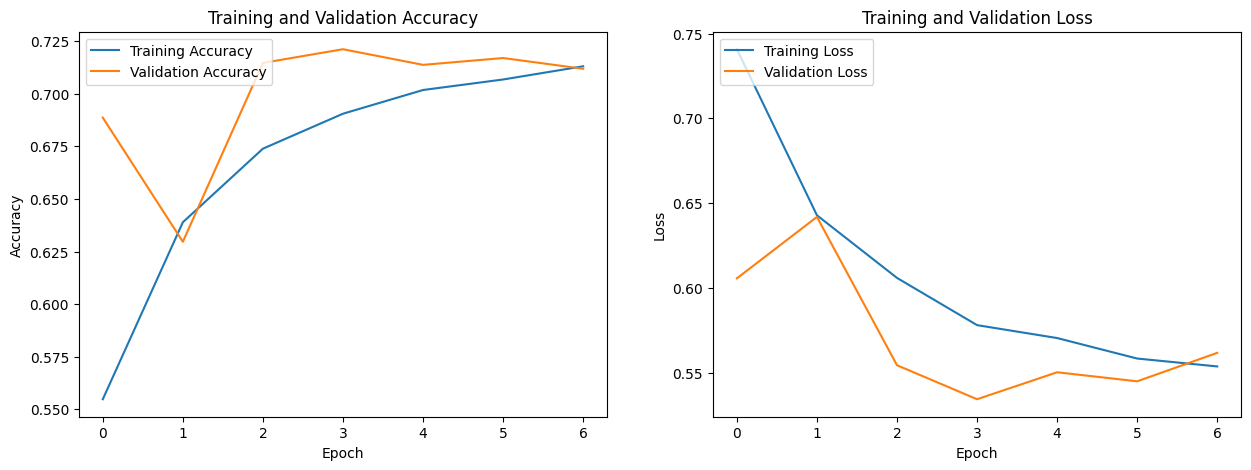

68/68 [==============================] - 1s 13ms/step
Train F1 Score: 0.7262
Test F1 Score: 0.7232


In [86]:
history_dict = history_3.history

# Plotting the accuracy
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history_dict['acc'], label='Training Accuracy')
plt.plot(history_dict['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting the loss
plt.subplot(122)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Predictions for F1 score calculation
train_pred = (model_xformer.predict(X_train) > 0.5).astype('int32')
test_pred = (model_xformer.predict(X_test) > 0.5).astype('int32')

# Calculating F1 score
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<font color="green">

The training accuracy reaches 71.31%, and the validation accuracy peaks at 72.12% in the fourth epoch. However, post the fourth epoch, the validation accuracy starts to decline slightly while the training accuracy continues to increase, suggesting the beginnings of overfitting.

The validation loss decreases initially, reaching its lowest at the fourth epoch (0.5344), but then starts to rise in later epochs. This fluctuation, along with the decline in validation accuracy, indicates that the model might be overfitting to the training data and losing its generalization ability on the validation set.

The F1 scores are quite high for both training (0.7262) and testing (0.7232), showing that we may have a good balance between precision and recall. The closeness of these scores suggests that the model is generalizing well despite signs of overfitting.

The training also stopped at the 7th epoch. 

The model shows a promising start but begins to overfit relatively early in the training process.

To combat overfitting, we will experiment with our next transformer.

</font>

# Tranformer 2

In [89]:
embed_dim = EMBED_SIZE  
num_heads = 4  # Increased number of attention heads
ff_dim = 64  # Increased feed-forward network size

inputs = Input(shape=(max_len,))
embedding_layer = GloveTokenAndPositionEmbedding(vocab_size, max_len, embed_dim, embedding_matrix)
x = embedding_layer(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = GlobalAveragePooling1D()(x)

# Increased dropout rate
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  # Added L2 regularization
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_xformer = Model(inputs=inputs, outputs=outputs)

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005,  # Reduced initial learning rate
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

model_xformer.compile(loss='binary_crossentropy', 
                      optimizer=Adam(learning_rate=lr_schedule), 
                      metrics=['acc'])

# Adjusted early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
history_4 = model_xformer.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping])

Epoch 1/20
269/269 [==============================] - 16s 54ms/step - loss: 1.2476 - acc: 0.5697 - val_loss: 0.9750 - val_acc: 0.6580
Epoch 2/20
269/269 [==============================] - 12s 46ms/step - loss: 0.8694 - acc: 0.6675 - val_loss: 0.7442 - val_acc: 0.7147
Epoch 3/20
269/269 [==============================] - 12s 46ms/step - loss: 0.7307 - acc: 0.6894 - val_loss: 0.6802 - val_acc: 0.7156
Epoch 4/20
269/269 [==============================] - 12s 46ms/step - loss: 0.6613 - acc: 0.6991 - val_loss: 0.6104 - val_acc: 0.7286
Epoch 5/20
269/269 [==============================] - 12s 46ms/step - loss: 0.6169 - acc: 0.7148 - val_loss: 0.5885 - val_acc: 0.7230
Epoch 6/20
269/269 [==============================] - 12s 46ms/step - loss: 0.5881 - acc: 0.7224 - val_loss: 0.5860 - val_acc: 0.7226
Epoch 7/20
269/269 [==============================] - 12s 46ms/step - loss: 0.5733 - acc: 0.7267 - val_loss: 0.5615 - val_acc: 0.7323
Epoch 8/20
269/269 [==============================] - 13s 47ms

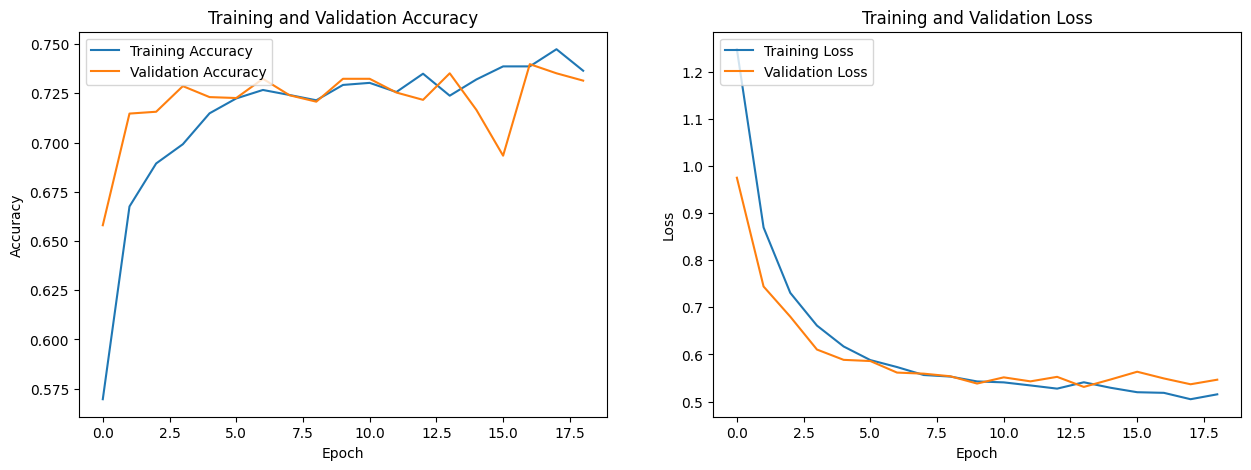

68/68 [==============================] - 1s 20ms/step
Train F1 Score: 0.7203
Test F1 Score: 0.7180


In [90]:
history_dict = history_4.history

# Plotting the accuracy
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history_dict['acc'], label='Training Accuracy')
plt.plot(history_dict['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting the loss
plt.subplot(122)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Predictions for F1 score calculation
train_pred = (model_xformer.predict(X_train) > 0.5).astype('int32')
test_pred = (model_xformer.predict(X_test) > 0.5).astype('int32')

# Calculating F1 score
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<font color="green">

#### Transformer  2 Results
We made the following changes to increase the performance of our transformers. 
 - num_heads = 4  # Increased number of attention heads
 - ff_dim = 64  # Increased feed-forward network size
 - added L2 regularization
 - Increased dropout to 0.5
 - Reduced initial learning rate

The training accuracy improved to 73.64%, and the validation accuracy improved from 65.80% to a peak of 73.98% in the 17th epoch. This shows that the model is learning well and performing well on the validation data. 

The reduction in loss graph shows that the model converged. 

The validation accuracy and loss have slight fluctuations in the later epochs - could be early signs of overfitting. 
    
The F1 scores for both training (0.7203) and testing (0.7180) are relatively high, indicating a good balance between precision and recall in the model’s predictions. The closeness of these scores should mean that the model is not biased towards the training data and is able to generalize its predictions to the validation data effectively.

The model demonstrates solid performance with good learning and generalization capabilities as indicated by the accuracy and F1 scores.

</font>

##### [1 points] Using the best parameters and architecture from the Transformer in the previous step, add a second Multi-headed self attention layer to your network. That is, the input to the second attention layer should be the output sequence of the first attention layer.  Visualize the performance of training and validation sets versus the training iterations, showing that the model converged.. 

### Transformer 3

In [105]:
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2

# TransformerBlock and GloveTokenAndPositionEmbedding definitions remain unchanged

embed_dim = EMBED_SIZE  
num_heads = 4  # Increased number of attention heads
ff_dim = 64  # Increased feed-forward network size

# Input layer
inputs = Input(shape=(max_len,))

# Embedding layer
embedding_layer = GloveTokenAndPositionEmbedding(vocab_size, max_len, embed_dim, embedding_matrix)
x = embedding_layer(inputs)

# First Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Second Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Dropout and Dense layers
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

# Model setup
model_xformer = Model(inputs=inputs, outputs=outputs)

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005, 
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Compile the model
model_xformer.compile(loss='binary_crossentropy', 
                      optimizer=Adam(learning_rate=lr_schedule), 
                      metrics=['acc'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



Epoch 1/20


2023-12-12 17:35:19.002514: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


269/269 [==============================] - 28s 91ms/step - loss: 1.2908 - acc: 0.5489 - val_loss: 0.9513 - val_acc: 0.7119
Epoch 2/20
269/269 [==============================] - 21s 77ms/step - loss: 0.8776 - acc: 0.6803 - val_loss: 0.7520 - val_acc: 0.7300
Epoch 3/20
269/269 [==============================] - 21s 77ms/step - loss: 0.7297 - acc: 0.7037 - val_loss: 0.6641 - val_acc: 0.7235
Epoch 4/20
269/269 [==============================] - 21s 76ms/step - loss: 0.6598 - acc: 0.7069 - val_loss: 0.6306 - val_acc: 0.7086
Epoch 5/20
269/269 [==============================] - 21s 76ms/step - loss: 0.6141 - acc: 0.7205 - val_loss: 0.5862 - val_acc: 0.7286
Epoch 6/20
269/269 [==============================] - 21s 76ms/step - loss: 0.5827 - acc: 0.7257 - val_loss: 0.5719 - val_acc: 0.7319
Epoch 7/20
269/269 [==============================] - 20s 76ms/step - loss: 0.5652 - acc: 0.7245 - val_loss: 0.5634 - val_acc: 0.7333
Epoch 8/20
269/269 [==============================] - 21s 77ms/step - los

In [ ]:
# Train the model
history_5 = model_xformer.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping])

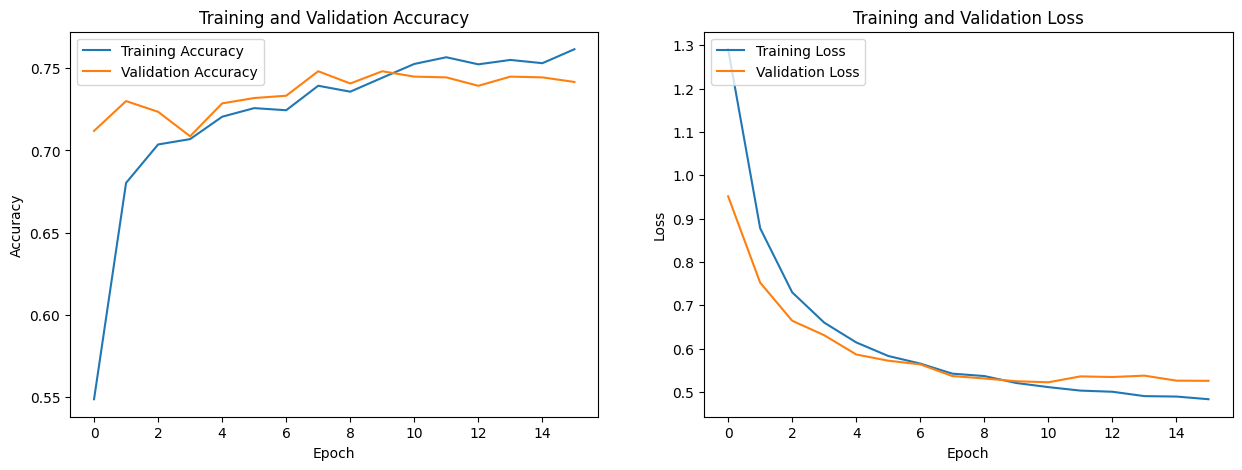

68/68 [==============================] - 2s 32ms/step
Train F1 Score: 0.7558
Test F1 Score: 0.7220


In [106]:
history_dict = history_5.history

# Plotting the accuracy
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history_dict['acc'], label='Training Accuracy')
plt.plot(history_dict['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting the loss
plt.subplot(122)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Predictions for F1 score calculation
train_pred = (model_xformer.predict(X_train) > 0.5).astype('int32')
test_pred = (model_xformer.predict(X_test) > 0.5).astype('int32')

# Calculating F1 score
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

##### [2 points] Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the models you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.

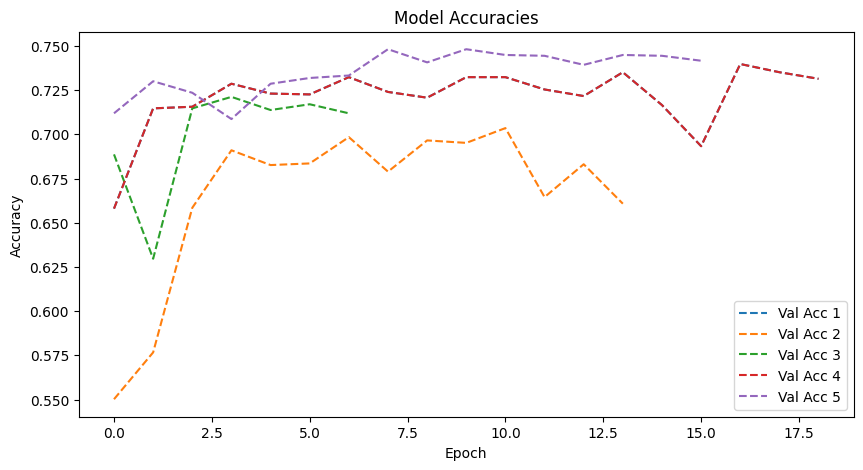

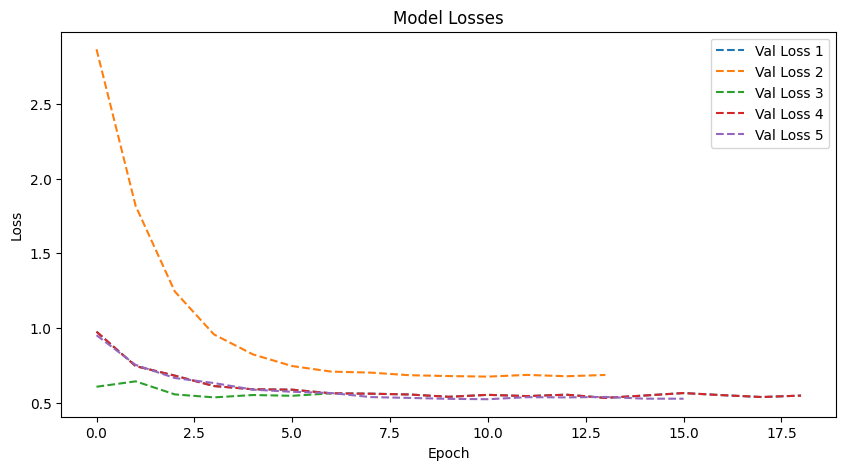

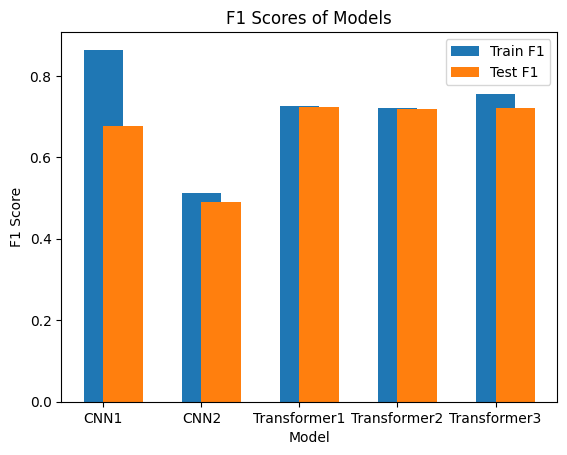

In [107]:
# Plotting accuracy for all models
plt.figure(figsize=(10, 5))
plt.title('Model Accuracies')
histories = [history, history_2, history_3, history_4, history_5]  # List of history objects
for i, hist in enumerate(histories):
    if 'val_acc' in hist.history:
        plt.plot(hist.history['val_acc'], label=f'Val Acc {i+1}', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss for all models
plt.figure(figsize=(10, 5))
plt.title('Model Losses')
for i, hist in enumerate(histories):
    if 'val_loss' in hist.history:
        plt.plot(hist.history['val_loss'], label=f'Val Loss {i+1}', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# F1 Score plotting
model_names = ['CNN1', 'CNN2', 'Transformer1', 'Transformer2', 'Transformer3']
f1_scores = [(0.8640, 0.6769), (0.5123, 0.4895), (0.7262, 0.7232), (0.7203, 0.7180), (0.7558, 0.7220)]
train_f1 = [score[0] for score in f1_scores]
test_f1 = [score[1] for score in f1_scores]

x = range(len(model_names))
plt.bar(x, train_f1, width=0.4, label='Train F1', align='center')
plt.bar(x, test_f1, width=0.4, label='Test F1', align='edge')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(x, model_names)
plt.title('F1 Scores of Models')
plt.legend()
plt.show()


In [109]:
model_names = ['CNN1', 'CNN2', 'Transformer1', 'Transformer2', 'Transformer3']
f1_scores = [(0.8640, 0.6769), (0.5123, 0.4895), (0.7262, 0.7232), (0.7203, 0.7180), (0.7558, 0.7220)]
histories = [history, history_2, history_3, history_4, history_5]

# Print out validation loss, accuracy, and F1 scores
for i, (model_name, hist) in enumerate(zip(model_names, histories)):
    last_epoch = len(hist.history['val_loss']) - 1
    val_loss = hist.history['val_loss'][last_epoch]
    val_acc = hist.history['val_acc'][last_epoch]
    train_f1, test_f1 = f1_scores[i]

    print(f"{model_name}:")
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Validation Accuracy: {val_acc:.4f}")
    print(f"  Training F1 Score: {train_f1:.4f}")
    print(f"  Testing F1 Score: {test_f1:.4f}\n")


CNN1:
  Validation Loss: 0.5464
  Validation Accuracy: 0.7314
  Training F1 Score: 0.8640
  Testing F1 Score: 0.6769

CNN2:
  Validation Loss: 0.6847
  Validation Accuracy: 0.6608
  Training F1 Score: 0.5123
  Testing F1 Score: 0.4895

Transformer1:
  Validation Loss: 0.5617
  Validation Accuracy: 0.7119
  Training F1 Score: 0.7262
  Testing F1 Score: 0.7232

Transformer2:
  Validation Loss: 0.5464
  Validation Accuracy: 0.7314
  Training F1 Score: 0.7203
  Testing F1 Score: 0.7180

Transformer3:
  Validation Loss: 0.5254
  Validation Accuracy: 0.7416
  Training F1 Score: 0.7558
  Testing F1 Score: 0.7220



In [113]:
from scipy.stats import f_oneway

model_names = ['CNN1', 'CNN2', 'Transformer1', 'Transformer2', 'Transformer3']
histories = [history, history_2, history_3, history_4, history_5]

# Collecting final epoch accuracies and losses
final_epoch_acc = [hist.history['val_acc'][-1] for hist in histories]
final_epoch_loss = [hist.history['val_loss'][-1] for hist in histories]

# Display each model's final epoch performance
print("Final Epoch Performances:")
for model_name, acc, loss in zip(model_names, final_epoch_acc, final_epoch_loss):
    print(f"{model_name} - Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# ANOVA Tests
f_stat_acc, p_val_acc = f_oneway(*[hist.history['val_acc'] for hist in histories])
f_stat_loss, p_val_loss = f_oneway(*[hist.history['val_loss'] for hist in histories])

# Display ANOVA test results
print("\nANOVA Test Results:")
print(f"Accuracy - F-statistic: {f_stat_acc:.4f}, P-value: {p_val_acc:.4f}")
print(f"Loss - F-statistic: {f_stat_loss:.4f}, P-value: {p_val_loss:.4f}")

# Interpretation of results
if p_val_acc < 0.05:
    print("\nThe differences in accuracy between some models are statistically significant.")
else:
    print("\nNo statistically significant differences in accuracy found between models.")

if p_val_loss < 0.05:
    print("The differences in loss between some models are statistically significant.")
else:
    print("No statistically significant differences in loss found between models.")


Final Epoch Performances:
CNN1 - Accuracy: 0.7314, Loss: 0.5464
CNN2 - Accuracy: 0.6608, Loss: 0.6847
Transformer1 - Accuracy: 0.7119, Loss: 0.5617
Transformer2 - Accuracy: 0.7314, Loss: 0.5464
Transformer3 - Accuracy: 0.7416, Loss: 0.5254

ANOVA Test Results:
Accuracy - F-statistic: 15.4386, P-value: 0.0000
Loss - F-statistic: 5.6866, P-value: 0.0005

The differences in accuracy between some models are statistically significant.
The differences in loss between some models are statistically significant.


<font color="green">

The results of the ANOVA tests suggest significant differences in both accuracy and loss among the five models (CNN1, CNN2, Transformer1, Transformer2, Transformer3).

### Our findings when comparing all 5 models.

### Accuracy:
F-Statistic (15.4386) & P-Value (0.0000): This low p-value indicates a high statistical significance in the differences of validation accuracies among the models. It's unlikely that these differences in accuracies occurred by chance.
Model Performances: Transformer3 shows the highest accuracy (0.7416), followed closely by CNN1 and Transformer2 (both at 0.7314). CNN2 lags behind with the lowest accuracy (0.6608).

### Loss:
F-Statistic (5.6866) & P-Value (0.0005): Similar to accuracy, the low p-value for loss also indicates significant differences among the models. It suggests that the variation in loss is not random.

Model Performances: Transformer3 leads with the lowest loss (0.5254), suggesting it's the best model in terms of both accuracy and loss. Transformer2 and CNN1 are competitive with similar losses. CNN2 shows the highest loss, indicating poorer performance.

### Overall:
- Transformer3 appears to be the best performing model in terms of both accuracy and loss. Its top performance in both metrics suggests it's effective at generalizing on the validation data.
- CNN2 might be underperforming compared to the others, as indicated by its lowest accuracy and highest loss.
- CNN1 and Transformer2 are closely matched, showing competitive performance, which is strong but not the top.


The difference between Transformer3 and Transformer2 may be statistically significant, but the practical impact (difference in performance) might be small.

</font>

### Exceptional Work (1 points total)
Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe.
##### Which method is better for your specific application? 

In [16]:
# Load ConceptNet Numberbatch embeddings
numberbatch_index = {}
with open('./numberbatch-en-19.08.txt', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        numberbatch_index[word] = coefs


In [17]:
# Create an embedding matrix
embedding_dim_numberbatch = 300  # Numberbatch dimensions
numberbatch_matrix = np.zeros((vocab_size, embedding_dim_numberbatch))
for word, i in word_index.items():
    embedding_vector = numberbatch_index.get(word)
    if embedding_vector is not None:
        numberbatch_matrix[i] = embedding_vector


In [21]:
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2


# TransformerBlock and GloveTokenAndPositionEmbedding definitions remain unchanged

embed_dim = 300  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

# Input layer
inputs = Input(shape=(max_len,))

# Embedding layer - using Numberbatch embeddings
embedding_layer = Embedding(vocab_size,
                            embedding_dim_numberbatch,
                            weights=[numberbatch_matrix],
                            input_length=max_len,
                            trainable=False)
x = embedding_layer(inputs)

# First Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Second Transformer block
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Dropout and Dense layers
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

# Model setup
model_numberbatch = Model(inputs=inputs, outputs=outputs)

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005,  # Reduced initial learning rate
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Compile the model
model_numberbatch.compile(loss='binary_crossentropy', 
                      optimizer=Adam(learning_rate=lr_schedule), 
                      metrics=['acc'])
print(model_numberbatch.summary())
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_8 (Embedding)     (None, 35, 300)           5495700   
                                                                 
 transformer_block_8 (Trans  (None, 35, 300)           1483864   
 formerBlock)                                                    
                                                                 
 transformer_block_9 (Trans  (None, 35, 300)           1483864   
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_5  (None, 300)               0         
  (GlobalAveragePooling1D)                                       
                                                           

In [22]:
# Train the model
history_numberbatch = model_numberbatch.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping])

Epoch 1/20


2023-12-12 19:11:59.909465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


269/269 [==============================] - 41s 145ms/step - loss: 1.5578 - acc: 0.5847 - val_loss: 1.0923 - val_acc: 0.7105
Epoch 2/20
269/269 [==============================] - 38s 141ms/step - loss: 0.9867 - acc: 0.6973 - val_loss: 0.8399 - val_acc: 0.7179
Epoch 3/20
269/269 [==============================] - 38s 142ms/step - loss: 0.7774 - acc: 0.7209 - val_loss: 0.6831 - val_acc: 0.7556
Epoch 4/20
269/269 [==============================] - 39s 144ms/step - loss: 0.6760 - acc: 0.7303 - val_loss: 0.6366 - val_acc: 0.7286
Epoch 5/20
269/269 [==============================] - 39s 145ms/step - loss: 0.6044 - acc: 0.7458 - val_loss: 0.5749 - val_acc: 0.7560
Epoch 6/20
269/269 [==============================] - 39s 144ms/step - loss: 0.5710 - acc: 0.7402 - val_loss: 0.5498 - val_acc: 0.7528
Epoch 7/20
269/269 [==============================] - 39s 143ms/step - loss: 0.5421 - acc: 0.7433 - val_loss: 0.5297 - val_acc: 0.7477
Epoch 8/20
269/269 [==============================] - 39s 145ms/st

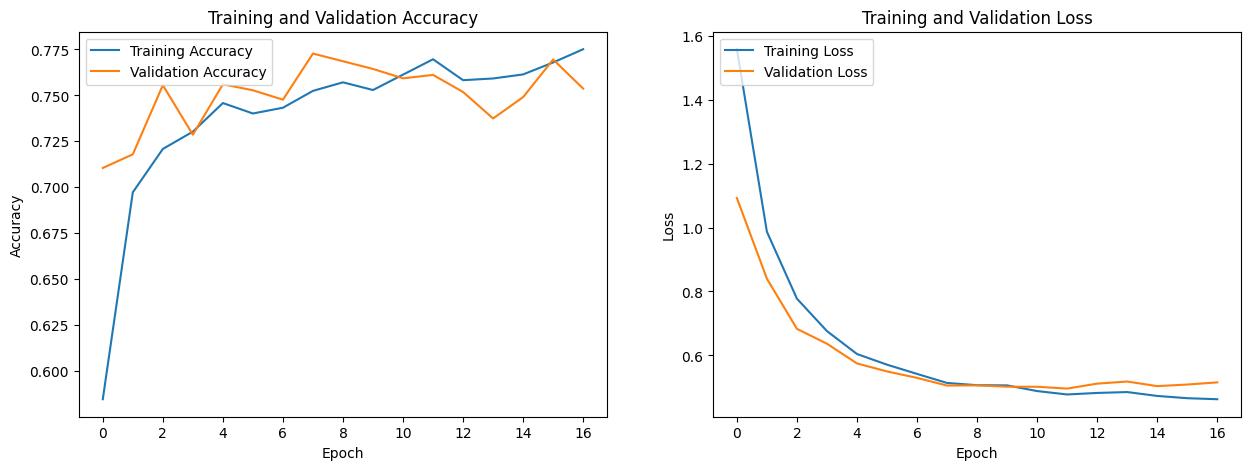

In [24]:
history_dict = history_numberbatch.history

# Plotting the accuracy
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history_dict['acc'], label='Training Accuracy')
plt.plot(history_dict['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting the loss
plt.subplot(122)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [30]:
# Comparison
from sklearn.metrics import f1_score

# Predictions from both models
y_pred_numberbatch = (model_numberbatch.predict(X_test) > 0.5).astype('int32')

f1_numberbatch = f1_score(y_test, y_pred_numberbatch)

print(f"F1 Score (Numberbatch): {f1_numberbatch:.4f}")

print(f"Final Validation Accuracy (Numberbatch): {history_numberbatch.history['val_acc'][-1]:.4f}")
print(f"Final Validation Loss (Numberbatch): {history_numberbatch.history['val_loss'][-1]:.4f}")


68/68 [==============================] - 4s 63ms/step
F1 Score (Numberbatch): 0.7384
Final Validation Accuracy (Numberbatch): 0.7537
Final Validation Loss (Numberbatch): 0.5156


<font color="green">

#### F1 Score
    
Numberbatch: 0.7384
    
GloVe: 0.7220
    
Comparison: The model with Numberbatch embeddings outperforms the one with GloVe embeddings in terms of F1 score. This indicates that the Numberbatch model is more effective at balancing precision and recall, suggesting it is better at managing the trade-off between false positives and false negatives.

#### Validation Accuracy
    
Numberbatch: 0.7537
    
GloVe: 0.7416
    
Comparison: The Numberbatch model also has a higher validation accuracy. This means it correctly classified a larger proportion of the validation dataset than the GloVe model. Although the difference is not large, it consistently suggests that Numberbatch is slightly better at generalizing from the training data.

#### Validation Loss
    
Numberbatch: 0.5156
    
GloVe: 0.5254
    
Comparison: With a lower validation loss, the Numberbatch model indicates a smaller gap between the predicted values and the actual labels. This lower loss aligns with the higher accuracy and F1 score, reinforcing the idea that the Numberbatch model is slightly more precise in its predictions.

#### Overall 
The ConceptNet Numberbatch model consistently outperforms the GloVe model across all evaluated metrics: F1 score, validation accuracy, and validation loss. For this particular task and dataset, the ConceptNet Numberbatch embeddings provide a slight edge in performance over the GloVe embeddings.

</font>